# MNIST Standard Biological Images: Gradient Descent

In [286]:
import matplotlib.pyplot as plt
import numpy as np
import time
import re

In [287]:
#Plot Loss Curve
def plot_loss(ttl, lr, losses):
    #ptitle = "Loss Curve - Gradient Descent, LR="
    #ptitle = ptitle + str(learning_rate)
    ptitle = ttl
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error Loss")
    #plt.title("Loss Curve - Gradient Descent")
    plt.title(ptitle)
    plt.show()

In [288]:
def flatten_X_data(contained_array, x_data):
    x_shape = x_data.shape
    end_of_range = len(x_shape)
    #print("end_of_range:", end_of_range)

    dim = ""
    if end_of_range == 4:
        if x_shape[3] == 3:
            dim = "RGB images:"
        else:
            dim = "3D images: "
        dim = dim + str(x_shape[1]) + "x" + str(x_shape[2]) + "x" + str(x_shape[3])
    elif end_of_range == 3:
        dim = "2D images: " + str(x_shape[1]) + "x" + str(x_shape[2])
    if (dim != ""):
        print(f"  {contained_array}: {x_shape[0]} {dim}")
    
    if (end_of_range > 2):
        # Handle 2D, 3D, ... nD image dimensions
        flat_sz = 1
        for ix in range(1, end_of_range):
            flat_sz = flat_sz * x_shape[ix]
        #print("flat_sz:", flat_sz)
        x_data = x_data.reshape(-1, flat_sz)
    else:
        # Convert label dimensions to 1D
        x_data = np.ravel(x_data, order='C')
    return(x_data)

In [289]:
def load_and_flatten(fn):
    blood_npz = np.load(fn, allow_pickle=True)
    #print(fn, "arrays:", blood_npz.files)

    data_arr = {}
    label_arr = {}
    substr = "labels"
    yx = 0
    for contained_array in blood_npz.files:
        #print(f"BEFORE: {contained_array}: {blood_npz[contained_array].shape}")
        arr = flatten_X_data(contained_array, blood_npz[contained_array])
        #print("arr.shape:", arr.shape) 
        #print(f"{substr}:{contained_array}")
        match = re.search(substr, contained_array)
        if (match):
            label_arr[contained_array] = arr
            #print(f"{contained_array} (flattened): {label_arr[contained_array].shape}")
        else:
            data_arr[contained_array] = arr
            #print(f"{contained_array} (flattened): {data_arr[contained_array].shape}")
    return data_arr, label_arr

In [290]:
def gradient_descent(learning_rate, epochs, X, y):
    #print("X.shape:", X.shape)
    #print("y.shape:", y.shape)

    print_rate = int(epochs / 5)

    loss_array = []

    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0.0
    max_sqrt = 1.3407807929942597e+153

    nan_detected = False
    # Gradient Descent Algorithm
    for epoch in range(epochs):
        # Predictions
        y_pred = np.dot(X, weights) + bias

        # Compute gradients
        error = y_pred - y
        # loss refers to the error calculated for a single
        # training example, while cost is the average of the
        # loss across the entire training dataset 
        is_overflow = error > max_sqrt
        if np.any(~is_overflow):
            loss = np.mean(error ** 2)
            loss_array.append(loss)
        else:
            print(f"Epoch: {epoch}: error-squared triggers overflow, terminating epochs")
            nan_detected = True
            break
        
        weight_gradient = (1 / len(y)) * np.dot(X.T, error)
        bias_gradient = (1 / len(y)) * np.sum(error)

        # Update weights and bias
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient
        is_nan = np.isnan(weights)
        if np.any(is_nan):
            print(f"Epoch {epoch}: NaN encountered for one or more weight values")
            nan_detected = True
            break

        #if epoch % print_rate == 0 or epoch == (epochs - 1):
        #    #print(f"Iteration {i}, Loss:  {loss:.6f}")
        #    print("Epoch:", epoch, "Loss:", loss)
        #    #print("dw: ", dw, "db: ", db)
        #print("Epoch:", epoch, "Loss:", loss)

    if (len(weights) > 5):
        print("\nOptimized Weights (last 5 only):")
        wx = len(weights) - 5
        print("  ", weights[wx], weights[wx+1], weights[wx+2], weights[wx+3], weights[wx+4])
    else:
        print("\nOptimized Weights:", weights)
    print("Optimized Bias:", bias)

    return nan_detected, loss_array

In [291]:
def gradientD(fn, epochs, learning_rt):
    mdl_type = "Gradient Descent"
    title = fn + ": " + mdl_type + " Epochs: " + str(epochs) + " LR: " + str(learning_rt)
    print("\n-------------------------------------------------------")
    print(f"{title}")
    features, labels = load_and_flatten(fn)

    #for key in features:
    #    features[key] = normalize_X_data(features[key])

    # Confirm data/label order is maintained
    feature_keys = list(features.keys())
    label_keys = list(labels.keys())
    #print(f"  feature keys: {feature_keys}")
    #print(f"  label keys:   {label_keys}")

    X_train = features[feature_keys[0]]
    y_train = labels[label_keys[0]]
    X_val = features[feature_keys[1]]
    y_val = labels[label_keys[1]]
    X_test = features[feature_keys[2]]
    y_test = labels[label_keys[2]]
    
    nan_err, losses = gradient_descent(learning_rt, epochs, X_train, y_train)

    print("Final Five MSE Loss Values:")
    lx = len(losses) - 5
    print("  ", round(losses[lx], 5), round(losses[lx+1], 5), round(losses[lx+2], 5), \
          round(losses[lx+3], 5), round(losses[lx+4], 5))

    if (nan_err == False):
        plot_loss(title, learning_rt, losses)
        
    return nan_err   


-------------------------------------------------------
bloodmnist.npz: Gradient Descent Epochs: 60 LR: 1e-09
  train_images: 11959 RGB images:28x28x3
  val_images: 1712 RGB images:28x28x3
  test_images: 3421 RGB images:28x28x3

Optimized Weights (last 5 only):
   8.438067770214743e-06 7.910228124747405e-06 9.828812016262925e-06 8.438816663430846e-06 7.904478452748064e-06
Optimized Bias: 4.3023743979804994e-08
Final Five MSE Loss Values:
   4.90635 4.90454 4.90277 4.90103 4.8993


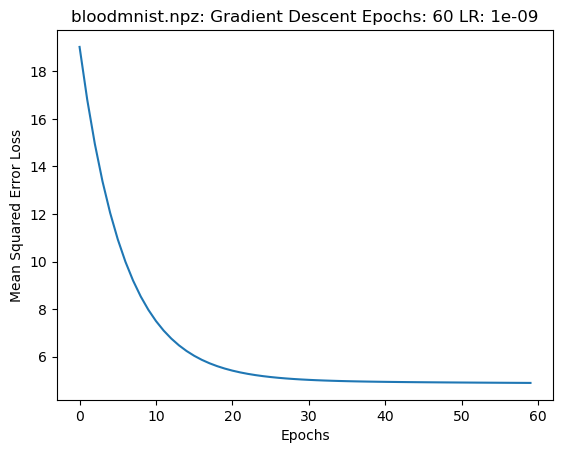


-------------------------------------------------------
breastmnist.npz: Gradient Descent Epochs: 75 LR: 1e-08
  train_images: 546 2D images: 28x28
  val_images: 78 2D images: 28x28
  test_images: 156 2D images: 28x28

Optimized Weights (last 5 only):
   4.540742254101655e-06 4.4617149700845185e-06 4.351295088811352e-06 4.21838062332164e-06 4.026219366161892e-06
Optimized Bias: 1.2605105184094592e-07
Final Five MSE Loss Values:
   0.20727 0.20722 0.20717 0.20712 0.20707


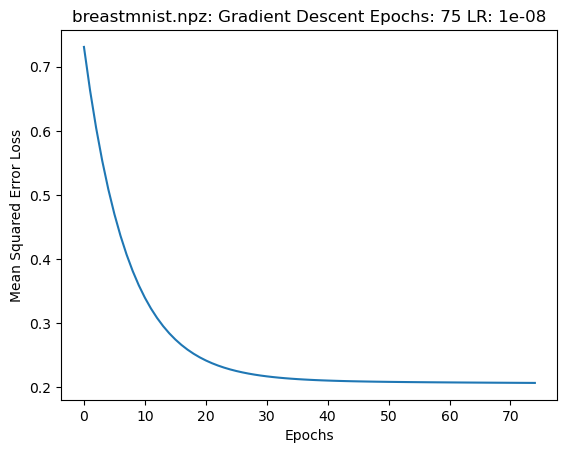


-------------------------------------------------------
dermamnist.npz: Gradient Descent Epochs: 75 LR: 1e-09
  train_images: 7007 RGB images:28x28x3
  val_images: 1003 RGB images:28x28x3
  test_images: 2005 RGB images:28x28x3

Optimized Weights (last 5 only):
   1.0096321418510522e-05 1.0514777313829693e-05 1.4202637680621691e-05 1.003341609123428e-05 1.044422090305151e-05
Optimized Bias: 7.084339059187689e-08
Final Five MSE Loss Values:
   2.42184 2.42105 2.42028 2.41955 2.41883


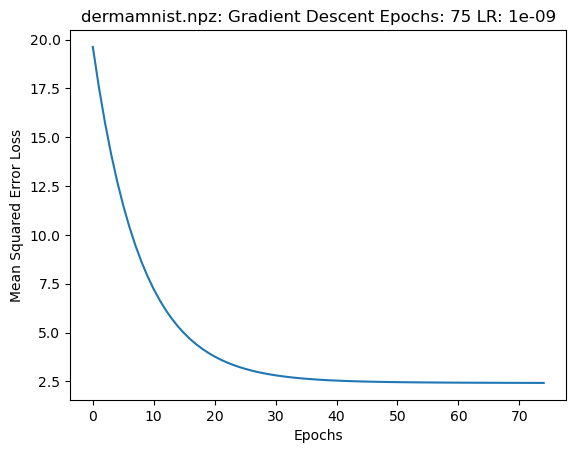


-------------------------------------------------------
octmnist.npz: Gradient Descent Epochs: 25 LR: 1e-07
  train_images: 97477 2D images: 28x28
  val_images: 10832 2D images: 28x28
  test_images: 1000 2D images: 28x28

Optimized Weights (last 5 only):
   4.844075023103519e-05 4.955619945190079e-05 5.012136006585989e-05 5.0865075434311306e-05 5.107394915340626e-05
Optimized Bias: 1.133177828954485e-06
Final Five MSE Loss Values:
   2.12871 2.12314 2.1179 2.11298 2.10835


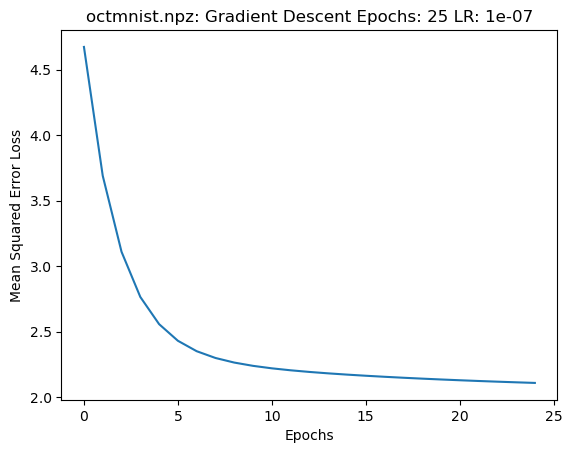


-------------------------------------------------------
organsmnist.npz: Gradient Descent Epochs: 50 LR: 1e-08
  train_images: 13932 2D images: 28x28
  val_images: 2452 2D images: 28x28
  test_images: 8827 2D images: 28x28

Optimized Weights (last 5 only):
   3.640144281506668e-05 3.378516547330177e-05 3.1584001000092805e-05 2.8561354741699184e-05 2.4805875313574203e-05
Optimized Bias: 7.221424377366887e-07
Final Five MSE Loss Values:
   13.90046 13.89209 13.88375 13.87544 13.86716


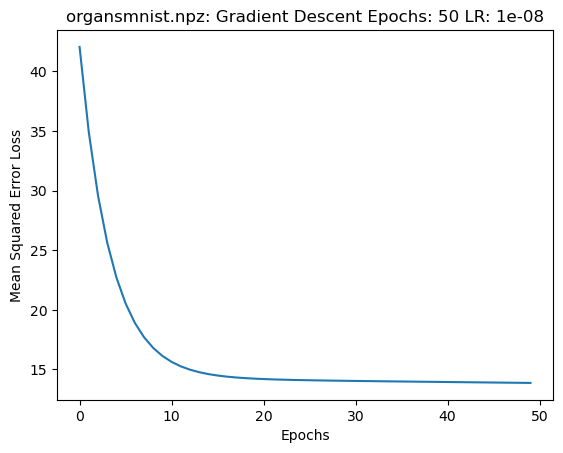


-------------------------------------------------------
nodulemnist3d.npz: Gradient Descent Epochs: 110 LR: 1e-08
  train_images: 1158 3D images: 28x28x28
  val_images: 165 3D images: 28x28x28
  test_images: 310 3D images: 28x28x28

Optimized Weights (last 5 only):
   -9.208247099226527e-07 -6.485191553017138e-07 -4.837926571623242e-07 -4.815516145066084e-07 -1.9118466325150388e-07
Optimized Bias: 2.4445552028941103e-08
Final Five MSE Loss Values:
   0.12169 0.12161 0.12153 0.12146 0.12138


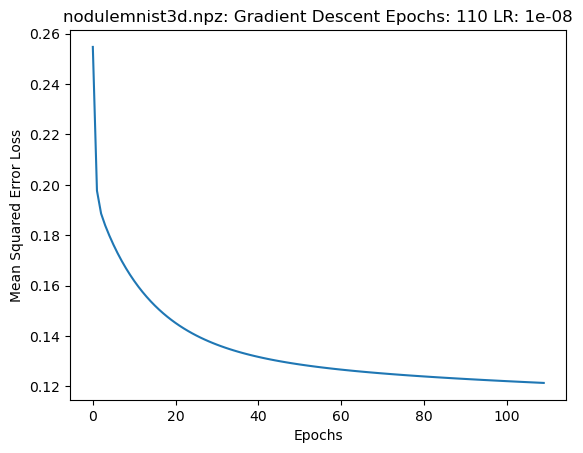


-------------------------------------------------------
organmnist3d.npz: Gradient Descent Epochs: 75 LR: 1e-10
  train_images: 971 3D images: 28x28x28
  val_images: 161 3D images: 28x28x28
  test_images: 610 3D images: 28x28x28

Optimized Weights (last 5 only):
   7.176665729696674e-07 7.152295693463857e-07 6.742449333744239e-07 6.709653440458692e-07 7.103253721076065e-07
Optimized Bias: 1.3496517422163757e-08
Final Five MSE Loss Values:
   13.93562 13.92439 13.91357 13.90312 13.89302


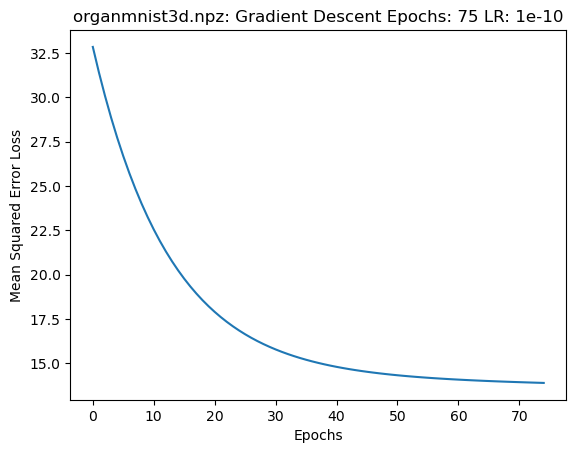


-------------------------------------------------------
retinamnist_128.npz: Gradient Descent Epochs: 110 LR: 1e-10
  train_images: 1080 RGB images:128x128x3
  val_images: 120 RGB images:128x128x3
  test_images: 400 RGB images:128x128x3

Optimized Weights (last 5 only):
   7.050045464811919e-09 7.050045464811919e-09 7.050045464811919e-09 7.050045464811919e-09 7.050045464811919e-09
Optimized Bias: 5.441618602396756e-09
Final Five MSE Loss Values:
   2.26919 2.26851 2.26783 2.26715 2.26647


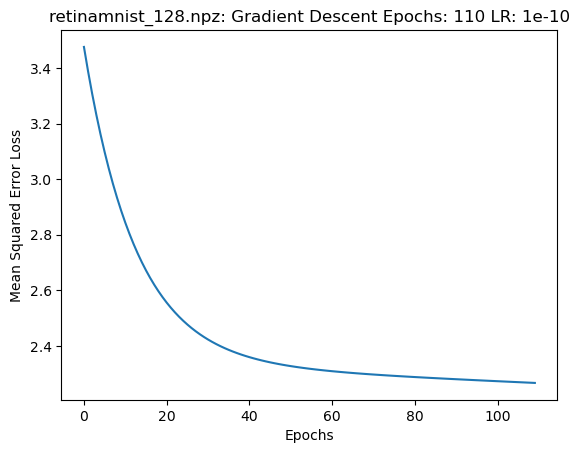

In [292]:
# NOTE: 'chestmnist.npz', # image, label size length mismatch, not used here
files = ['bloodmnist.npz', 'breastmnist.npz', 'dermamnist.npz', 'octmnist.npz', 'organsmnist.npz', \
         'nodulemnist3d.npz', 'organmnist3d.npz', 'retinamnist_128.npz']

file_params = {
    'bloodmnist.npz' : {
        'lr': [0.000000001],
        'ep': [60]
    },
    'breastmnist.npz' : {
        'lr': [0.00000001],
        'ep': [75]
    },
    'dermamnist.npz' : {
        'lr': [0.000000001],
        'ep': [75]
    },
    'octmnist.npz' : {
        'lr': [0.0000001],
        'ep': [25]
    },
    'organsmnist.npz' : {
        'lr': [0.00000001],
        'ep': [50]
    },
    'nodulemnist3d.npz' : {
        'lr': [0.00000001],
        'ep': [110]
    },
    'organmnist3d.npz' : {
        'lr': [0.0000000001],
        'ep': [75]
    },
    'retinamnist_128.npz' : {
        'lr': [0.0000000001],
        'ep': [110]
    },
}

for fn, data in file_params.items():
    for epoch in data['ep']:
        for lr in data['lr']:
            #print(f"{fn}: Epochs: {epoch}, Learning Rate: {lr}")
            gradientD(fn, epoch, lr)